In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('AAPL.csv', header=0, usecols=['Date', 'Close'], parse_dates=True, index_col='Date')
print(data)

                 Close
Date                  
2014-05-06   84.915718
2014-05-07   84.618568
2014-05-08   83.998573
2014-05-09   83.648575
2014-05-12   84.690002
...                ...
2019-04-29  204.610001
2019-04-30  200.669998
2019-05-01  210.520004
2019-05-02  209.149994
2019-05-03  211.750000

[1258 rows x 1 columns]


In [3]:
import matplotlib.pyplot as plt

/home/batu/anaconda3/envs/tradebot/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


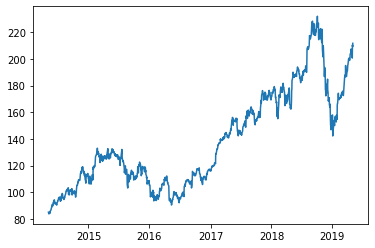

In [4]:
plt.plot(data['Close'])
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[0.00853747]
 [0.0065354 ]
 [0.00235814]
 ...
 [0.85480532]
 [0.84557478]
 [0.8630925 ]]


In [6]:
TRAIN_SPLIT = int(len(scaled_data) * 0.7)
train_length = TRAIN_SPLIT
test_length = int(len(scaled_data)) - TRAIN_SPLIT
train_data = scaled_data[0:train_length,:]
test_data = scaled_data[train_length:len(scaled_data),:]

In [7]:
import numpy as np

In [8]:
def create_dataset(dataset, timestep=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - timestep-1):
        data_x.append(dataset[i:(i+timestep), 0])
        data_y.append(dataset[i+timestep, 0])
    return np.array(data_x), np.array(data_y)

In [9]:
timestep = 1
train_x, train_y = create_dataset(train_data, timestep)
test_x, test_y = create_dataset(test_data, timestep)

print(train_x)

[[0.00853747]
 [0.0065354 ]
 [0.00235814]
 [0.        ]
 [0.00701669]
 [0.00791184]
 [0.00801768]
 [0.003157  ]
 [0.01152124]
 [0.01833582]
 [0.01845132]
 [0.01999132]
 [0.02091529]
 [0.02751814]
 [0.03858703]
 [0.03702775]
 [0.04797147]
 [0.04568073]
 [0.0414938 ]
 [0.05005049]
 [0.05705758]
 [0.05949272]
 [0.05777949]
 [0.06772217]
 [0.07142786]
 [0.06880021]
 [0.05822222]
 [0.05141726]
 [0.05761582]
 [0.05680734]
 [0.05748109]
 [0.05532507]
 [0.0489244 ]
 [0.04838538]
 [0.04467969]
 [0.04521871]
 [0.04885701]
 [0.05613359]
 [0.06253426]
 [0.06650941]
 [0.06623995]
 [0.06994559]
 [0.08301649]
 [0.07883917]
 [0.07910868]
 [0.07675055]
 [0.07796331]
 [0.0862505 ]
 [0.07863706]
 [0.07499876]
 [0.06361225]
 [0.07264062]
 [0.06933922]
 [0.07459452]
 [0.09123633]
 [0.0901583 ]
 [0.09447034]
 [0.10356605]
 [0.09925401]
 [0.0977044 ]
 [0.08052357]
 [0.08409447]
 [0.08045618]
 [0.07728957]
 [0.07621153]
 [0.07297752]
 [0.07472925]
 [0.08315122]
 [0.08301649]
 [0.09157318]
 [0.09332497]
 [0.09

In [10]:
print(train_x.shape)

(878, 1)


In [11]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [12]:
print(train_x)

[[[0.00853747]]

 [[0.0065354 ]]

 [[0.00235814]]

 [[0.        ]]

 [[0.00701669]]

 [[0.00791184]]

 [[0.00801768]]

 [[0.003157  ]]

 [[0.01152124]]

 [[0.01833582]]

 [[0.01845132]]

 [[0.01999132]]

 [[0.02091529]]

 [[0.02751814]]

 [[0.03858703]]

 [[0.03702775]]

 [[0.04797147]]

 [[0.04568073]]

 [[0.0414938 ]]

 [[0.05005049]]

 [[0.05705758]]

 [[0.05949272]]

 [[0.05777949]]

 [[0.06772217]]

 [[0.07142786]]

 [[0.06880021]]

 [[0.05822222]]

 [[0.05141726]]

 [[0.05761582]]

 [[0.05680734]]

 [[0.05748109]]

 [[0.05532507]]

 [[0.0489244 ]]

 [[0.04838538]]

 [[0.04467969]]

 [[0.04521871]]

 [[0.04885701]]

 [[0.05613359]]

 [[0.06253426]]

 [[0.06650941]]

 [[0.06623995]]

 [[0.06994559]]

 [[0.08301649]]

 [[0.07883917]]

 [[0.07910868]]

 [[0.07675055]]

 [[0.07796331]]

 [[0.0862505 ]]

 [[0.07863706]]

 [[0.07499876]]

 [[0.06361225]]

 [[0.07264062]]

 [[0.06933922]]

 [[0.07459452]]

 [[0.09123633]]

 [[0.0901583 ]]

 [[0.09447034]]

 [[0.10356605]]

 [[0.09925401]

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

Using TensorFlow backend.


In [15]:
# the order you add the layers matters in Sequential
model = Sequential()
model.add(LSTM(256, input_shape=(1,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.fit(train_x, train_y, epochs=1, batch_size=1, verbose=1)
score = model.evaluate(train_x, train_y, verbose=0)
print('Keras model loss = ',score[0])
print('Keras model accuracy = ',score[1])

Epoch 1/1
878/878 [==============================] - 3s 4ms/step - loss: 0.0160 - accuracy: 0.0011
Keras model loss =  0.0018033181260931803
Keras model accuracy =  0.0011389522114768624


In [17]:
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)
print(test_predictions)

[[0.50670433]
 [0.49365392]
 [0.5010633 ]
 [0.5276126 ]
 [0.5381236 ]
 [0.5414759 ]
 [0.55000836]
 [0.5478643 ]
 [0.5406384 ]
 [0.5364453 ]
 [0.52061933]
 [0.50694686]
 [0.5191702 ]
 [0.513427  ]
 [0.5123983 ]
 [0.5314625 ]
 [0.5423728 ]
 [0.54243255]
 [0.5371647 ]
 [0.53104174]
 [0.5093707 ]
 [0.5236963 ]
 [0.5188682 ]
 [0.51130867]
 [0.5103398 ]
 [0.5065225 ]
 [0.50840133]
 [0.50870425]
 [0.52863586]
 [0.5227916 ]
 [0.5262276 ]
 [0.52592635]
 [0.5364453 ]
 [0.5510794 ]
 [0.53986025]
 [0.5387227 ]
 [0.5426717 ]
 [0.5426717 ]
 [0.5159675 ]
 [0.51614887]
 [0.5190494 ]
 [0.5078559 ]
 [0.5261672 ]
 [0.52598655]
 [0.53080124]
 [0.5426119 ]
 [0.5387227 ]
 [0.5386028 ]
 [0.5383632 ]
 [0.5442848 ]
 [0.5550597 ]
 [0.54971075]
 [0.5669374 ]
 [0.5678785 ]
 [0.5631662 ]
 [0.5545257 ]
 [0.554763  ]
 [0.53794384]
 [0.5192306 ]
 [0.52164537]
 [0.5001529 ]
 [0.49414015]
 [0.49693456]
 [0.49906   ]
 [0.45480257]
 [0.43053403]
 [0.47017846]
 [0.4489781 ]
 [0.42246956]
 [0.43005186]
 [0.4682324 ]
 [0.47

In [18]:
train_predictions = scaler.inverse_transform(train_predictions)
train_y = scaler.inverse_transform([train_y])

test_predictions = scaler.inverse_transform(test_predictions)
test_y = scaler.inverse_transform([test_y])

print(train_predictions)

[[ 99.88412 ]
 [ 99.772446]
 [ 99.54158 ]
 [ 99.4125  ]
 [ 99.79924 ]
 [ 99.84916 ]
 [ 99.85507 ]
 [ 99.58551 ]
 [100.05176 ]
 [100.44016 ]
 [100.446815]
 [100.53569 ]
 [100.5892  ]
 [100.9758  ]
 [101.64053 ]
 [101.54561 ]
 [102.220665]
 [102.077644]
 [101.81859 ]
 [102.351265]
 [102.797066]
 [102.95403 ]
 [102.84349 ]
 [103.49231 ]
 [103.73869 ]
 [103.563736]
 [102.87201 ]
 [102.437546]
 [102.832954]
 [102.781   ]
 [102.82429 ]
 [102.686035]
 [102.28044 ]
 [102.24661 ]
 [102.01543 ]
 [102.0489  ]
 [102.27619 ]
 [102.737785]
 [103.151566]
 [103.41223 ]
 [103.39447 ]
 [103.63985 ]
 [104.52524 ]
 [104.238884]
 [104.25726 ]
 [104.09692 ]
 [104.17925 ]
 [104.74912 ]
 [104.225105]
 [103.97845 ]
 [103.22197 ]
 [103.81985 ]
 [103.599525]
 [103.951195]
 [105.098076]
 [105.02223 ]
 [105.326866]
 [105.980835]
 [105.66888 ]
 [105.557625]
 [104.353966]
 [104.59965 ]
 [104.34934 ]
 [104.13347 ]
 [104.060394]
 [103.84245 ]
 [103.96026 ]
 [104.53452 ]
 [104.52524 ]
 [105.1218  ]
 [105.24561 ]
 [105.

In [20]:
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_predictions)+1,:] = train_predictions

In [21]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predictions)+2+1:len(scaled_data)-1,:] = test_predictions

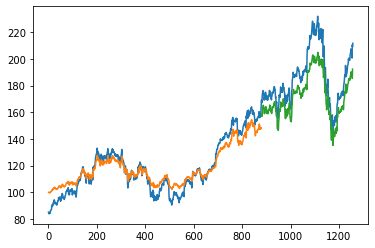

In [22]:
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()